# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project 3: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import renders as rs
from IPython.display import display # Allows the use of display() for DataFrames

# Show matplotlib plots inline (nicely formatted in the notebook)
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [2]:
# Display a description of the dataset
display(data.describe())

Fresh          Milk       Grocery        Frozen  \
count     440.000000    440.000000    440.000000    440.000000   
mean    12000.297727   5796.265909   7951.277273   3071.931818   
std     12647.328865   7380.377175   9503.162829   4854.673333   
min         3.000000     55.000000      3.000000     25.000000   
25%      3127.750000   1533.000000   2153.000000    742.250000   
50%      8504.000000   3627.000000   4755.500000   1526.000000   
75%     16933.750000   7190.250000  10655.750000   3554.250000   
max    112151.000000  73498.000000  92780.000000  60869.000000   

       Detergents_Paper  Delicatessen  
count        440.000000    440.000000  
mean        2881.493182   1524.870455  
std         4767.854448   2820.105937  
min            3.000000      3.000000  
25%          256.750000    408.250000  
50%          816.500000    965.500000  
75%         3922.000000   1820.250000  
max        40827.000000  47943.000000

### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [3]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [75, 85, 95]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

Chosen samples of wholesale customers dataset:


Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  20398   1137        3    4407                 3           975
1  16117  46197    92780    1026             40827          2944
2      3   2920     6252     440               223           709

### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

**Answer:**<BR>
<font color='red'><UL>
<LI>Sub-Sample 0 (index 75) - this customer mainly orders products in the "Fresh" category. The size of the "Fresh" products total is more than what 75% of samples show, which indicates it is relatively large. This could possibly represent a large produce market store or chain. It could also be consistent with a restaurant or restaurant chain, where the focus is on purchasing fresh ingredients for the preparation of meals.
<LI>Sub-Sample 1 (index 85) - this customer orders relatively large quantities from all categories, the biggest sum being in the "Grocery" category, followed by "Milk" and "Detergents_Paper". This could be consistent with a large supermarket, though I would have expected the "Frozen" category to be high, too. Another possible explanation could be a large cafeteria style establishment, where the emphasis is on "assembling" meal choices, as opposed to cooking meals from "scratch". 
<LI>Sub-Sample 2 (index 95) - this customer mostly focuses on above median orders in the "Grocery" category, followed by below median orders in the "Milk" and "Delicatessen" categories. The focus on non-perishable products and the relatively small size may be consistent with something like a conveneince store or a gas-station store.

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [4]:
# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
new_data = data.drop('Delicatessen', axis = 1)

# TODO: Split the data into training and testing sets using the given feature as the target
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(new_data, data['Delicatessen'], test_size=0.25, random_state=15)

# TODO: Create a decision tree regressor and fit it to the training set
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=15)
regressor.fit(X_train, y_train)

# TODO: Report the score of the prediction using the testing set
score = regressor.score(X_test, y_test)
print "Coefficient of determination (R^2) for the test set is {:,.2f}".format(score)

Coefficient of determination (R^2) for the test set is -0.28


### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature is necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

**Answer:**<BR>
<font color='red'>
I attempted to predict the "Delicatessen" feature and got a prediction score of -0.28. As the hint states, this means the model fails to fit the data. My understanding is that the attempt to find a correlation (regression model) between some combination of the other spending categories and the "Delicatessen" category failed. If there was a correlation tying even 1 of the other categories to "Delicatessen", we would have expected the score to be above zero and closer to 1. The fact that it is negative suggests an inference relationship doesn't exist in either direction, which means the feature is necessary for identifying customers' spending habits.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

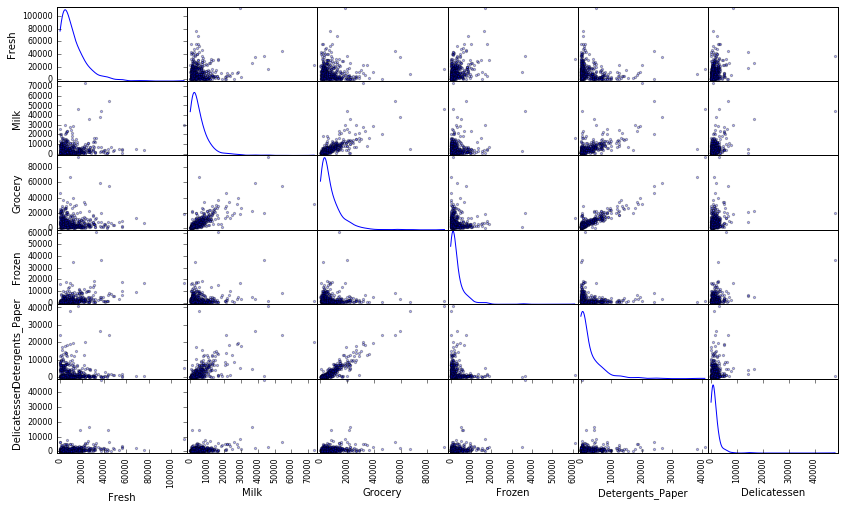

In [5]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

**Answer:**<BR>
<font color='red'><ul>
<li>Judging by visual inspection (which is not very accurate) it seems that there's some degree of correlation between (Grocery, Detergents_Paper) and to a lesser degree between (Milk, Grocery) and (Milk, Detergents_Paper).
<li>The scatter plots seem to confirm that the Delicatessen feature is relevant - there does not seem to be an appearant correlation between Delicatessen and any of the other feaures.
<li>The distribution of all features seems fairly right-skewed, with most data point having lower values and fewer data points having higher values.

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying a logarithm scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying a logrithm scaling. Again, use `np.log`.

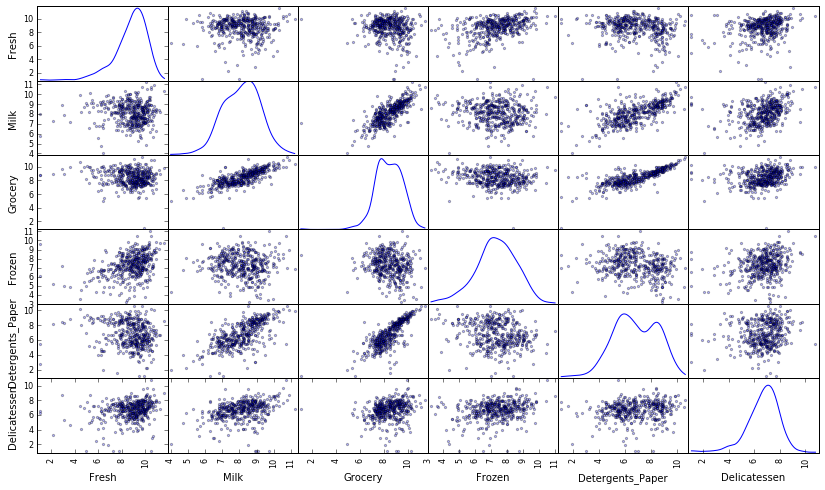

In [6]:
# TODO: Scale the data using the natural logarithm
log_data = data.apply(np.log)

# TODO: Scale the sample data using the natural logarithm
log_samples = samples.apply(np.log)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [7]:
# Display the log-transformed sample data
display(log_samples)

Fresh       Milk    Grocery    Frozen  Detergents_Paper  Delicatessen
0  9.923192   7.036148   1.098612  8.390949          1.098612      6.882437
1  9.687630  10.740670  11.437986  6.933423         10.617099      7.987524
2  1.098612   7.979339   8.740657  6.086775          5.407172      6.563856

### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [7]:
# ADDITIONAL_CODE: define dataframe to keep track of outliers across columns
outliers_df = pd.DataFrame()
outliers_df['count'] = 0

# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # ADDITIONAL_CODE: add feature as column to outliers dataframe
    outliers_df[feature] = float('NaN')
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5 * (Q3 - Q1)
    
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    
    # ADDITIONAL_CODE: add outliers of current feature to global outliers dataframe
    for index, row in log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))].iterrows():
        if index not in outliers_df.index: 
            outliers_df.set_value(index, 'count', 1)
        else:
            outliers_df.set_value(index, 'count', outliers_df.loc[index]['count'] + 1)
        outliers_df.set_value(index, feature, row[feature])

# ADDITIONAL_CODE: display the outliers dataframe
outliers_df = outliers_df.fillna('')
print "Outliers Dataframe where more than one feature is an outlier:"
display(outliers_df[outliers_df['count']>1])

# OPTIONAL: Select the indices for data points you wish to remove
outliers  = []

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'Fresh':


Fresh       Milk    Grocery    Frozen  Detergents_Paper  Delicatessen
65   4.442651   9.950323  10.732651  3.583519         10.095388      7.260523
66   2.197225   7.335634   8.911530  5.164786          8.151333      3.295837
81   5.389072   9.163249   9.575192  5.645447          8.964184      5.049856
95   1.098612   7.979339   8.740657  6.086775          5.407172      6.563856
96   3.135494   7.869402   9.001839  4.976734          8.262043      5.379897
128  4.941642   9.087834   8.248791  4.955827          6.967909      1.098612
171  5.298317  10.160530   9.894245  6.478510          9.079434      8.740337
193  5.192957   8.156223   9.917982  6.865891          8.633731      6.501290
218  2.890372   8.923191   9.629380  7.158514          8.475746      8.759669
304  5.081404   8.917311  10.117510  6.424869          9.374413      7.787382
305  5.493061   9.468001   9.088399  6.683361          8.271037      5.351858
338  1.098612   5.808142   8.856661  9.655090          2.708050      6.309918
353  4.762174   8.742574   9.961898  5.429346          9.069007      7.013016
355  5.247024   6.588926   7.606885  5.501258          5.214936      4.844187
357  3.610918   7.150701  10.011086  4.919981          8.816853      4.700480
412  4.574711   8.190077   9.425452  4.584967          7.996317      4.127134

Data points considered outliers for the feature 'Milk':


Fresh       Milk    Grocery    Frozen  Detergents_Paper  Delicatessen
86   10.039983  11.205013  10.377047  6.894670          9.906981      6.805723
98    6.220590   4.718499   6.656727  6.796824          4.025352      4.882802
154   6.432940   4.007333   4.919981  4.317488          1.945910      2.079442
356  10.029503   4.897840   5.384495  8.057377          2.197225      6.306275

Data points considered outliers for the feature 'Grocery':


Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicatessen
75   9.923192  7.036148  1.098612  8.390949          1.098612      6.882437
154  6.432940  4.007333  4.919981  4.317488          1.945910      2.079442

Data points considered outliers for the feature 'Frozen':


Fresh      Milk    Grocery     Frozen  Detergents_Paper  Delicatessen
38    8.431853  9.663261   9.723703   3.496508          8.847360      6.070738
57    8.597297  9.203618   9.257892   3.637586          8.932213      7.156177
65    4.442651  9.950323  10.732651   3.583519         10.095388      7.260523
145  10.000569  9.034080  10.457143   3.737670          9.440738      8.396155
175   7.759187  8.967632   9.382106   3.951244          8.341887      7.436617
264   6.978214  9.177714   9.645041   4.110874          8.696176      7.142827
325  10.395650  9.728181   9.519735  11.016479          7.148346      8.632128
420   8.402007  8.569026   9.490015   3.218876          8.827321      7.239215
429   9.060331  7.467371   8.183118   3.850148          4.430817      7.824446
439   7.932721  7.437206   7.828038   4.174387          6.167516      3.951244

Data points considered outliers for the feature 'Detergents_Paper':


Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicatessen
75   9.923192  7.036148  1.098612  8.390949          1.098612      6.882437
161  9.428190  6.291569  5.645447  6.995766          1.098612      7.711101

Data points considered outliers for the feature 'Delicatessen':


Fresh       Milk    Grocery     Frozen  Detergents_Paper  \
66    2.197225   7.335634   8.911530   5.164786          8.151333   
109   7.248504   9.724899  10.274568   6.511745          6.728629   
128   4.941642   9.087834   8.248791   4.955827          6.967909   
137   8.034955   8.997147   9.021840   6.493754          6.580639   
142  10.519646   8.875147   9.018332   8.004700          2.995732   
154   6.432940   4.007333   4.919981   4.317488          1.945910   
183  10.514529  10.690808   9.911952  10.505999          5.476464   
184   5.789960   6.822197   8.457443   4.304065          5.811141   
187   7.798933   8.987447   9.192075   8.743372          8.148735   
203   6.368187   6.529419   7.703459   6.150603          6.860664   
233   6.871091   8.513988   8.106515   6.842683          6.013715   
285  10.602965   6.461468   8.188689   6.948897          6.077642   
289  10.663966   5.655992   6.154858   7.235619          3.465736   
343   7.431892   8.848509  10.177932   7.283448          9.646593   

     Delicatessen  
66       3.295837  
109      1.098612  
128      1.098612  
137      3.583519  
142      1.098612  
154      2.079442  
183     10.777768  
184      2.397895  
187      1.098612  
203      2.890372  
233      1.945910  
285      2.890372  
289      3.091042  
343      3.610918

Outliers Dataframe where more than one feature is an outlier:


count    Fresh     Milk  Grocery   Frozen Detergents_Paper Delicatessen
65     2.0  4.44265                    3.58352                              
66     2.0  2.19722                                                  3.29584
128    2.0  4.94164                                                  1.09861
154    3.0           4.00733  4.91998                                2.07944
75     2.0                    1.09861                   1.09861

### Question 4
*Are there any data points considered outliers for more than one feature based on the definition above? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

**Answer:**<BR>
<font color='red'>
I've added some additional code to make it easy to see the data points that have outliers in more than one feature. There seem to be 5 data points (4 with 2 features with outliers and 1 with 3 features with outlies). I do not think these data points should be removed, as they have half or more of their features that are not considered outliers. This suggests to me that these data points are not simply 'noise' or a measurement error and should be considered in the analysis. Furthermore, by changing the "step" parameter to 3 times the IQR (instead of 1.5), I can see that there isn't a single data point with multiple features considered "extreme" outliers. If there were, I would look into those points more carefully.

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

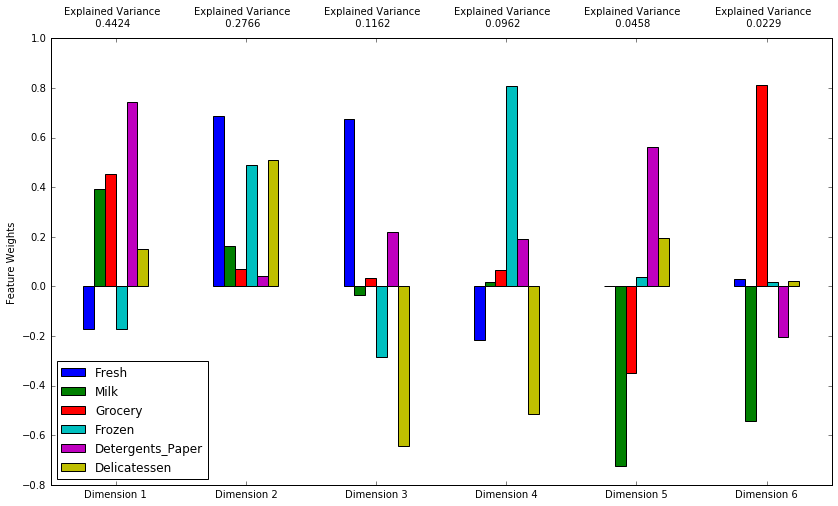

In [8]:
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
from sklearn.decomposition import PCA
pca = PCA(n_components=6).fit(good_data)

# TODO: Transform the sample log-data using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = rs.pca_results(good_data, pca)

### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the indivdual feature weights.

**Answer:**<BR>
<font color='red'><UL>
<LI>The first and second principal compenents explain about 71.9% of the variance in the dataset. 
<LI>The first 4 principal components explain about 93.14% of the variance in the dataset
<LI>The first principal component is the most single significant charectaristic of customer spending. Customers that have a high value for this componet spend a relatively high amount on products in the Detergents_Paper, Grocery and Milk categories. They spend slightly above average amounts on Delicatessen and somewhat below average amounts on Fresh and Frozen products. This component can be imagined to distinguish between focus on cooking ingredients on the negative end and ready to "consume" items on the positive end.
<LI>The seond principal component presents the relative speed of increase in spending for the different categories. I would say that because all weights are positive, this component can be used to supplement the size of the customer (in terms of spending). It also shows that as the spending grows relative to component 1, the spending on Fresh products increases most rapidly, followed by Delicatessen and Frozen products. 
<LI>Combining the two interpretations for components 1 and 2, we can consider the possible combinations:<UL>
  <LI>Customers that focus on ready to "consume" items and spend more (positive on components 1 and 2) tend to be more balanced between the categories (say, like Supermarkets)
  <LI>Customers that focus on ready to "consume" items and spend less (positive on component 1, negative on component 2) seem to be much more specialized in ready to "consume" categories (say, like convenience stores)
  <LI>Customers that focus on cooking ingredients and spend relatively more (negative on component 1, positive on component 2) seem to be more specialized on cooking ingredients (say, like large markets or bigger restaurants)
  <LI>Customers that focus on cooking ingredients and spend relatively less (negative on components 1 and 2) tend to be more balanced (say, like small produce stores).
</UL>
<LI>The third principal component represents a small degree of negative correlation between Fresh products (and to a lesser degree Detergents_Paper) and Delicatessen products (and to a lesser degree Frozen products). I don't think it deserves a interpretation of its own - I would guess it's more of a risidual effect of the variances in the data.
<LI>The forth principal component represents a small degree of negative correlation between Frozen products (and to a lesser degree Detergents_Paper) and Delicatessen products (and to a lesser degree Fresh products). Again, I don't think it deserves a interpretation of its own - I would guess it's more of a risidual effect of the variances in the data.


### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [9]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

Dimension 1  Dimension 2  Dimension 3  Dimension 4  Dimension 5  \
0      -8.3665       0.5353      -1.0888      -1.0634       0.2159   
1       5.3459       1.9442       0.7429      -0.2108      -0.5297   
2       0.5721      -5.9329      -5.0156       0.4633      -0.8491   

   Dimension 6  
0      -4.1768  
1       0.2928  
2       0.3529

### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the reuslts to `reduced_data`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [10]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2).fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform the sample log-data using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

Dimension 1  Dimension 2
0      -8.3665       0.5353
1       5.3459       1.9442
2       0.5721      -5.9329

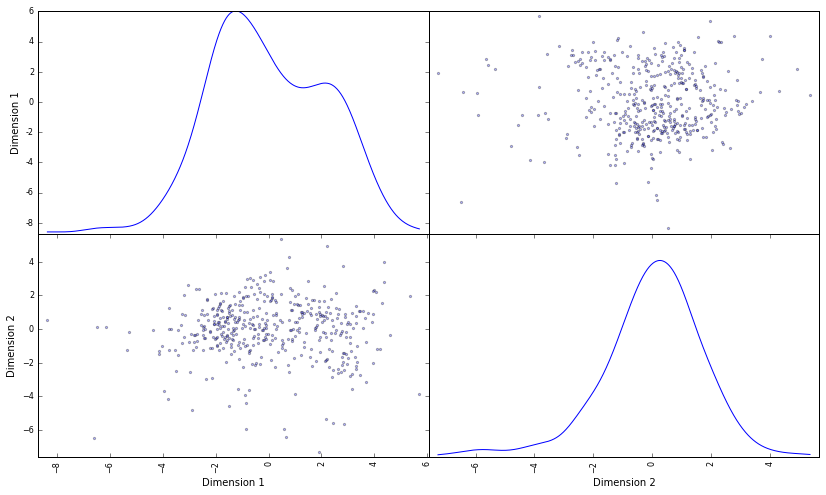

In [11]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

# Additional code: produce a scatter matrix for the new data
pd.scatter_matrix(reduced_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

**Answer:**<BR>
<font color='red'><UL>
<LI>The advantages of K-Means seem to be that it's a relatively simple, easy to implement and fast algorithm. During each iteration each point is classified into a cluster based on the centroid it's closest to - a fairly straight-forward calculation. The end results have no ambiguity and each point belongs to only one cluster. The center positions of each cluster simply represent the average of the points in that cluster.
<LI>The advantages of using a Gaussian Mixture Model clustering algorithm is that it can be useful in cases where there exists overlap between the clusters and/or ambiguity in cluster affiliation is inherent in the nature of the data. When interpretting the results, we get the probability of a point belonging to each of the clusters, which can be more useful than just a single classification (in certain cases).
<LI>Looking at the 2-dimensional data in the scatter plot, it looks like any clusters would have significant overlap. The data points are not well separated. Knowing the nature of the data, I also assume that there are many different types and sizes of customers, and therefore clustering into a relatively small number of clusters will likely bring about ambiguity. To capture some of that ambiguity, I'll use the Gaussian Mixture Model clustering algorithm. 

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import sklearn.metrics.silhouette_score and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [13]:
from sklearn.mixture import GMM
#from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

n=3

# TODO: Apply your clustering algorithm of choice to the reduced data 
# for GMM
clusterer = GMM(n_components=n, random_state=16).fit(reduced_data)
# for KMeans
#clusterer = KMeans(n_clusters=n).fit(reduced_data)

# TODO: Predict the cluster for each data point
preds = clusterer.predict(reduced_data)

# TODO: Find the cluster centers
# for GMM
centers = clusterer.means_
# for KMeans
#centers = clusterer.cluster_centers_

# TODO: Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)

# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
score = silhouette_score(reduced_data, preds)
print 'Silhouette score for {} clusters is {:,.2f}'.format(n, score)

Silhouette score for 3 clusters is 0.38


### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

**Answer:**<BR>
<font color='red'><UL>
<LI>Silhouette score for 2 clusters is 0.32
<LI><B>Silhouette score for 3 clusters is 0.38</B>
<LI>Silhouette score for 4 clusters is 0.34
<LI>Silhouette score for 5 clusters is 0.26
<LI>Silhouette score for 6 clusters is 0.27
<LI>Silhouette score for 7 clusters is 0.31
<LI>Silhouette score for 8 clusters is 0.31
<LI>Silhouette score for 9 clusters is 0.27
<LI>Silhouette score for 10 clusters is 0.33


### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

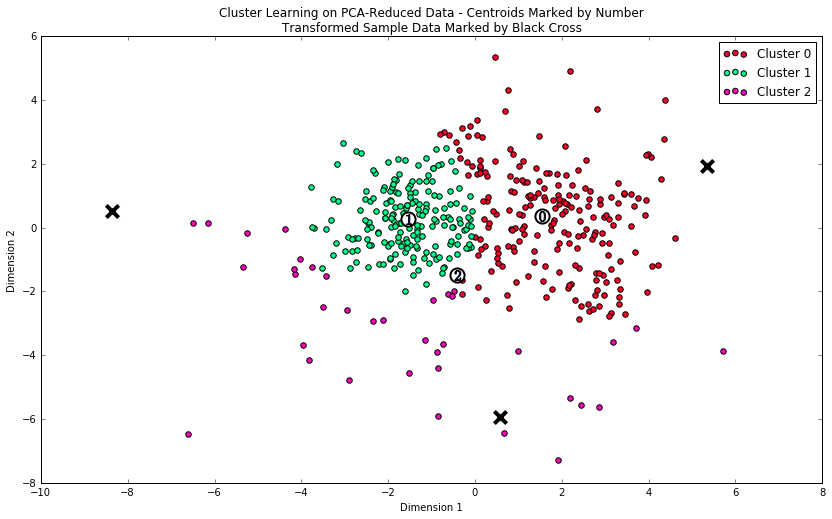

In [14]:
# Display the results of the clustering from implementation
rs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [15]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

Fresh    Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
Segment 0  6064.0  6532.0   9539.0  1356.0            2821.0        1185.0
Segment 1  9805.0  1923.0   2353.0  2216.0             285.0         720.0
Segment 2  2433.0  2246.0   3458.0   778.0             609.0         348.0

### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

**Answer:**
<font color='red'>

The following table summerizes approximate quartile positions of the various data points:

|           | Fresh      | Milk      | Grocery   | Frozen    | Detergents_Paper | Delicatessen |
| --------- |:----------:|:---------:|:---------:|:---------:|:----------------:|:------------:|
| Segment 0 |  below 50% | above 50% | below 75% | below 50% | below 75%        | above 50%    |
| Segment 1 |  above 50% | above 25% | above 25% | above 50% | above 25%        | below 50%    |
| Segment 2 |  below 25% | below 50% | above 25% | above 25% | below 50%        | below 25%    |

<UL>
<LI>Segment 0 - relatively big spending across the board, relative focus on Detergents_Paper, Grocery, Milk and Delicateseen, with slightly below median spending on Fresh and Frozen products. This could represent a supermarket.
<LI>Segment 1 - Above median spending on Fresh and Frozen products, followed by Delicatessen and low focus on Milk, Grocery and Detergents_Paper. This could represent market stores focused on Fresh/Frozen products or Restaurants/Chains focused on buying cooking ingredients to prepare meals.
<LI>Segment 2 - relatively small spending across the board, relative focus on Milk and Detergents_Paper followed by Grocery and Frozen. This could represnt convenience stores.

### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [16]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred

Sample point 0 predicted to be in Cluster 2
Sample point 1 predicted to be in Cluster 0
Sample point 2 predicted to be in Cluster 2


**Answer:**<BR>
<font color='red'>
Based on the analysis in question 1:<UL>
<LI>Sample point 0 (index 75) seems like it should belong in segment 1 ("Restaurant or Prduce Market"). The prediction of it being in Cluster 2 is not consistent with that. I believe that this is due to a few reasons:<UL>
    <LI>I selected the samples to represent extremes to create maximum difference between the samples - this makes these samples more prone to be at the edges. Index 75 was actually listed as an outlier on 2 of the 6 dimensions. My decision not to remove any of the points may have created the opportunity for more confusion in the interpretation.
    <LI>The nature of the GMM algorithm is that it can create overlapping Gaussians. In this case, cluster 2 seems to overlap with both cluster 1 and cluster 0, representing points at the edges, where the density of the distribution is lower and the distance from the centers of clusters 0 and 1 are relatively big. Visually, it looks like some of the points at the upper left of cluster 2 should really belong to cluster 1</UL>
<LI> Sample point 1 (index 85) seems like it should belong to cluster 0 ("Supermarket"), which is consistent with the prediction
<LI> Sample point 2 (index 95) seems like it should belong to cluster 2 ("Convenience Store"), which is consistent with the prediction

## Conclusion

### Question 10
Companies often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether that change affects its customers positively or negatively. The wholesale distributor wants to consider changing its delivery service from 5 days a week to 3 days a week, but will only do so if it affects their customers positively. *How would you use the customer segments you found above to perform an A/B test for this change?*  
**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**<BR>
<font color='red'>
The following A/B test procedure can be used to use the customer segments found above:<UL>
<LI>Devise a KPI (key performance indicator) to assess the way the change affects their customers (such as customer satisfaction through net promoter score).
<LI>Devise a process through which information will be gathered and the KPI will be calculated
<LI>Determine the amount of time for the experiment
<LI>Identify a representative random sample from each cluster - those customers will get deliveries 3 days a week, while the rest of the customers will remain at the previous level of 5 days a week
<LI>Perform the experiment over the determined length of time and collect the information to calculate the KPI
<LI>For each cluster, perform analysis to check whether the KPI is statistically significantly worse for the customers receiving deliveries only 3 days a week (could be something like a T-test).
<LI>For each cluster in isolation, if the result of the analysis shows the KPI for deliveries 3 times a week is no worse than the KPI for deliveries 5 times a week, then the company can more safely consider switching to deliveries 3 times a week for all the customers in that cluster.

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a segment it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and has made estimates for each customer's annual spending of the six product categories. Knowing these estimates, the wholesale distributor wants to classify each new customer to one of the customer segments to determine the most appropriate delivery service.  
*Describe a supervised learning strategy you could use to make classification predictions for the ten new customers.*  
**Hint:** What other input feature could the supervised learner use besides the six product features to help make a prediction?

**Answer:**<BR>
<font color='red'>

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

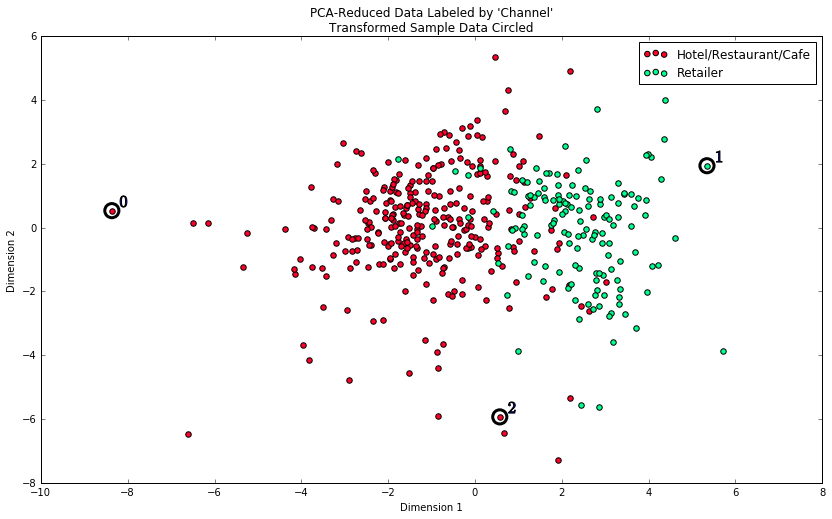

In [17]:
# Display the clustering results based on 'Channel' data
rs.channel_results(reduced_data, outliers, pca_samples)

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

**Answer:**<BR>
<font color='red'><UL>
<LI>The algorithm I chose resulted in 3 clusters. 2 of the main clusters I identified seem relatively similar to the 2 clusters in the underlying distribution. My analysis also produced a 3rd cluster for customers who are relativley low on dimension 2 and therefore seem smaller more specialized in non-Fresh/non-Frozen products (like convenience stores would be). This 3rd cluster is not present in the underlying distribution and further information would be required to test whether it has any significance in this case.
<LI>The visual representation of the distributions suggests some overlap between the clusters, so I would not say that any one establishment can be classified purely into only one cluster based on their spending alone.
<LI>The classifications are only somewhat consistent with my interpretation. The "Hotel/Restaurant/Cafe" classification is what I thought was "Restaurant or Produce Market" cluster. The "Retailer" cluster is what I considered "Supermarket" cluster. Furthermore, there is no classification to address my 3rd cluster of "Convenience Stores".


> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.